In [2]:
import pandas as pd

In [3]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
alucar = pd.read_csv('alucar.csv')
alucar

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


In [5]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [6]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [7]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [8]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [9]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

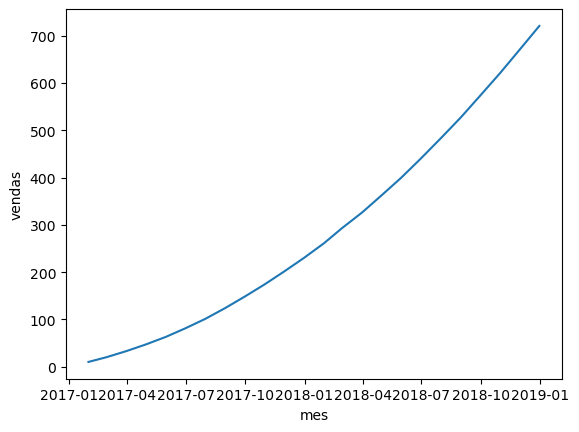

In [10]:
sns.lineplot(x='mes', y='vendas', data = alucar)

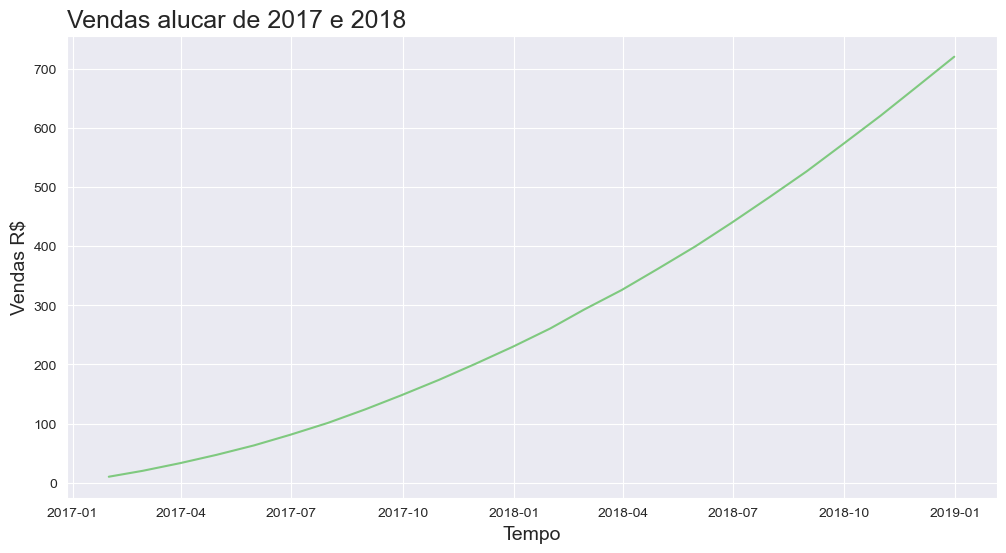

In [11]:
sns.set_palette('Accent') #troquei a cor da linha do gráfico
sns.set_style('darkgrid') #adicionei a malha quadriculada 
ax = sns.lineplot(x='mes', y= 'vendas', data = alucar) #guardei o plot do gráfico em uma variável
ax.figure.set_size_inches(12,6) #aumentei a escala do gráfico
ax.set_title('Vendas alucar de 2017 e 2018', loc= 'left', fontsize = 18) #coloquei um título no gráfico, mudei sua posição para a esquerda e aumentei o tamanho da fonte do título
ax.set_xlabel('Tempo',fontsize=14) #alterei o nome e a fonte da legenda do eixo x
ax.set_ylabel('Vendas R$', fontsize=14) #alterei o nome e a fonte da legenda do eixo y
ax=ax

In [12]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [13]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


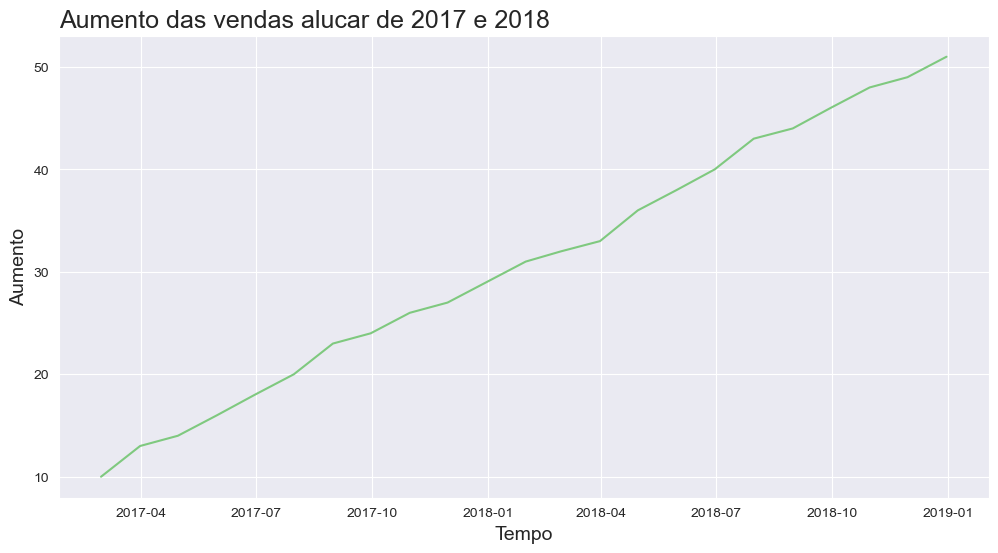

In [14]:
sns.set_palette('Accent') #troquei a cor da linha do gráfico
sns.set_style('darkgrid') #adicionei a malha quadriculada 
ax = sns.lineplot(x='mes', y= 'aumento', data = alucar) #guardei o plot do gráfico em uma variável
ax.figure.set_size_inches(12,6) #aumentei a escala do gráfico
ax.set_title('Aumento das vendas alucar de 2017 e 2018', loc= 'left', fontsize = 18) #coloquei um título no gráfico, mudei sua posição para a esquerda e aumentei o tamanho da fonte do título
ax.set_xlabel('Tempo',fontsize=14) #alterei o nome e a fonte da legenda do eixo x
ax.set_ylabel('Aumento', fontsize=14) #alterei o nome e a fonte da legenda do eixo y
ax=ax

In [15]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data = dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc= 'left', fontsize = 18)
    ax.set_xlabel(labelx,fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax=ax

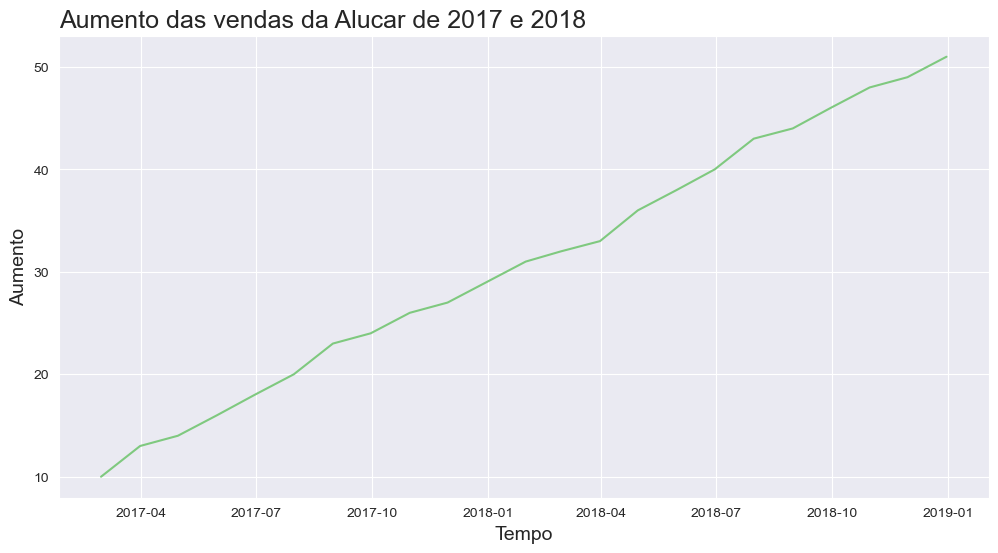

In [16]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [17]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


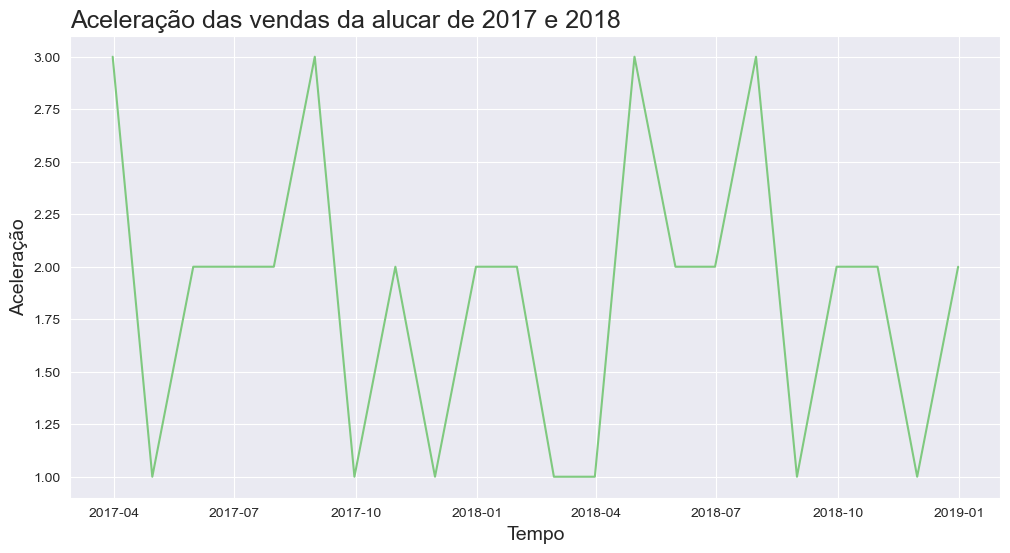

In [18]:
plotar('Aceleração das vendas da alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

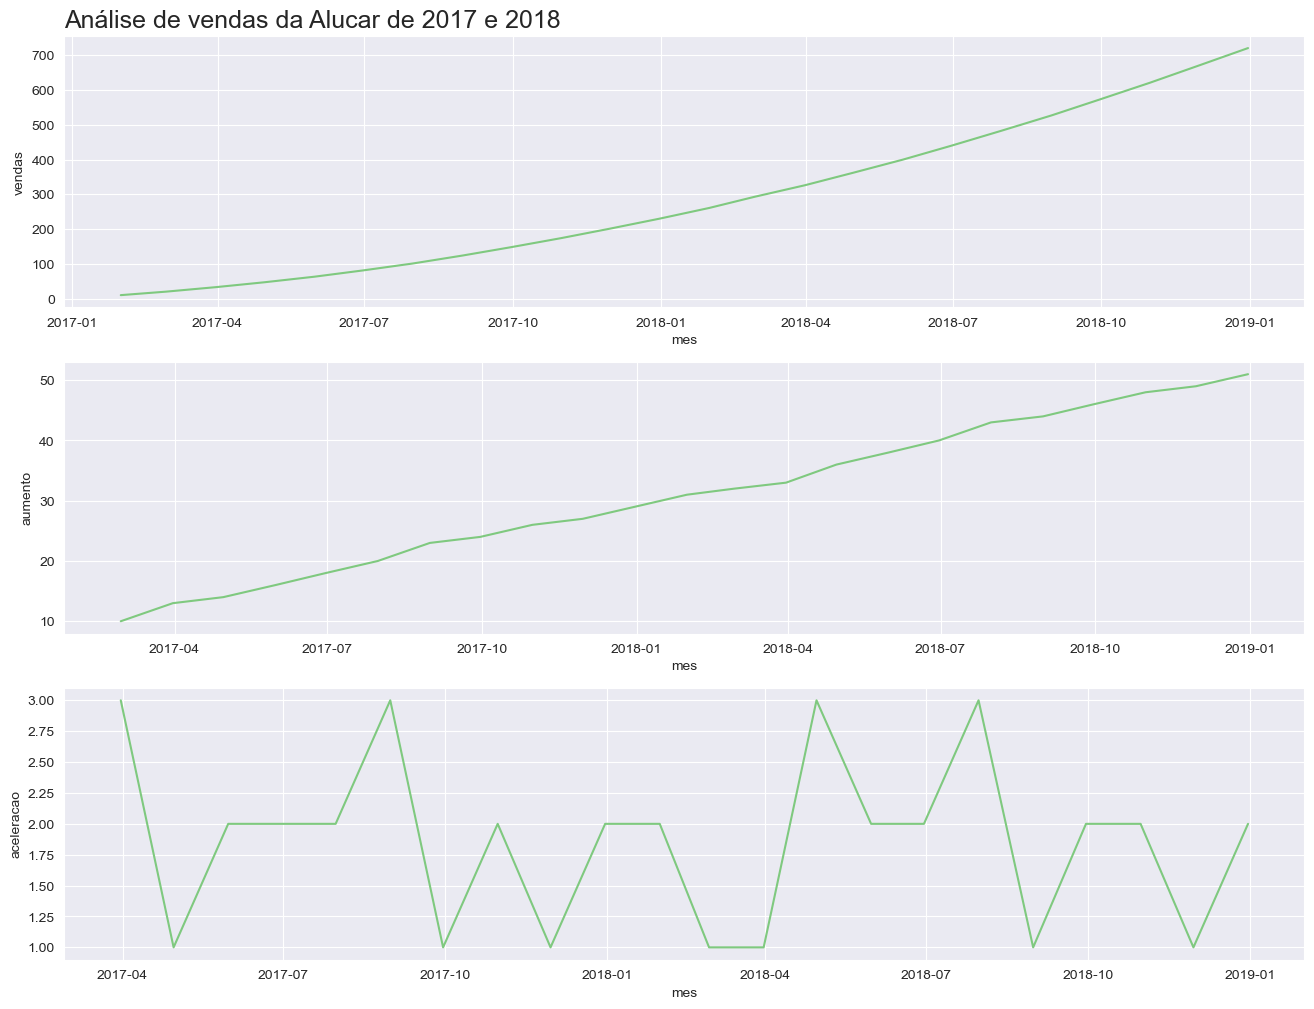

In [19]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data = alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data = alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data = alucar)
ax=ax

In [20]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data = dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data = dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data = dataset)
    ax=ax

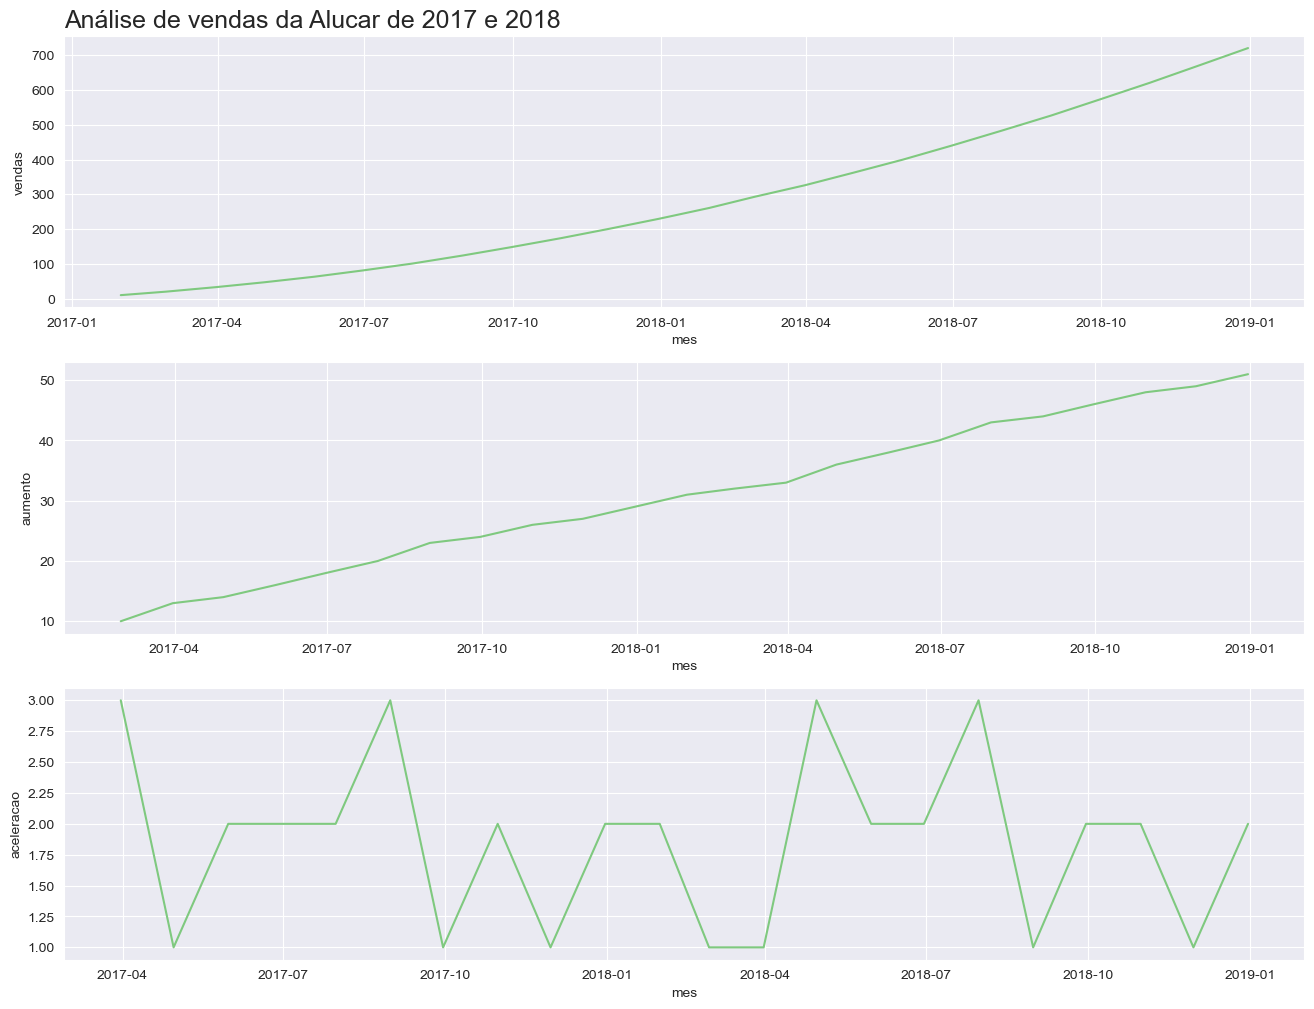

In [21]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de vendas da Alucar de 2017 e 2018')

In [22]:
from pandas.plotting import autocorrelation_plot

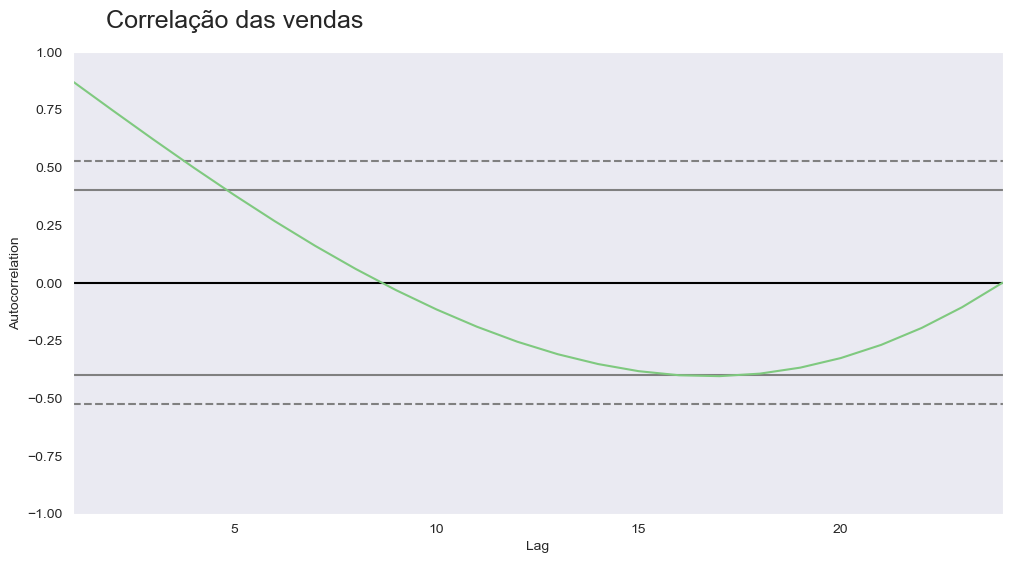

In [23]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize = 18, x=0.26,y=0.95)
autocorrelation_plot(alucar['vendas'])
ax=ax

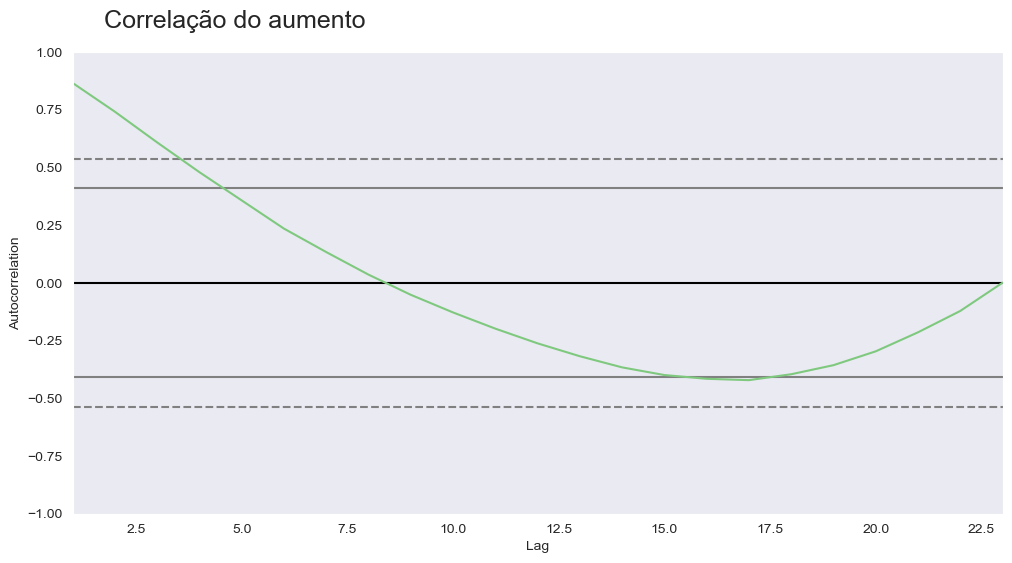

In [24]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize = 18, x=0.26,y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax=ax

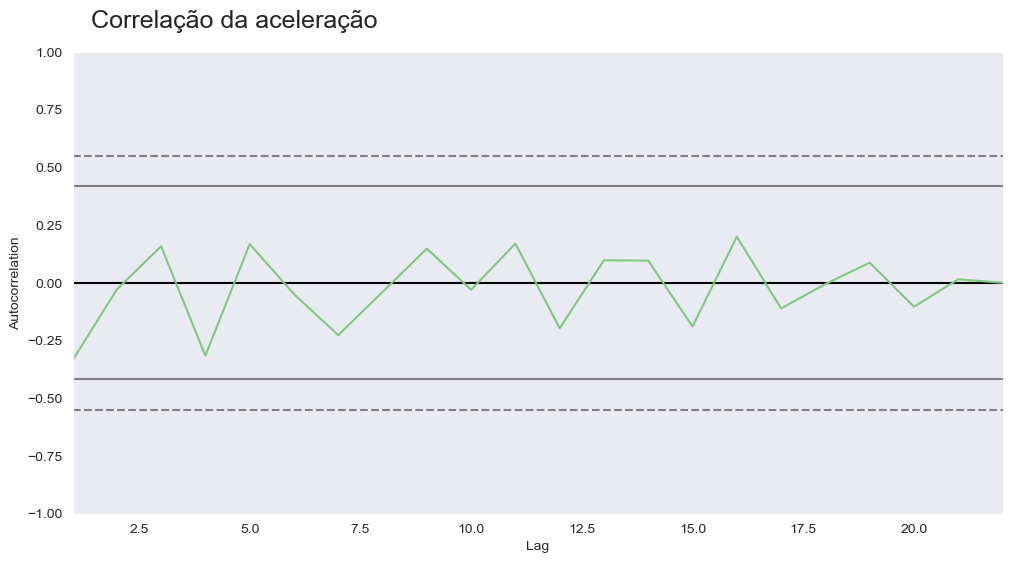

In [25]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize = 18, x=0.26,y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax=ax

## Alucar - analisando assinantes da newsletter

In [26]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49
5,2017-06-30,66
6,2017-07-31,85
7,2017-08-31,107
8,2017-09-30,132
9,2017-10-31,160


In [27]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [28]:
print('Quantidade de linhas e colunas:',assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [29]:
assinantes['mes']= pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [30]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


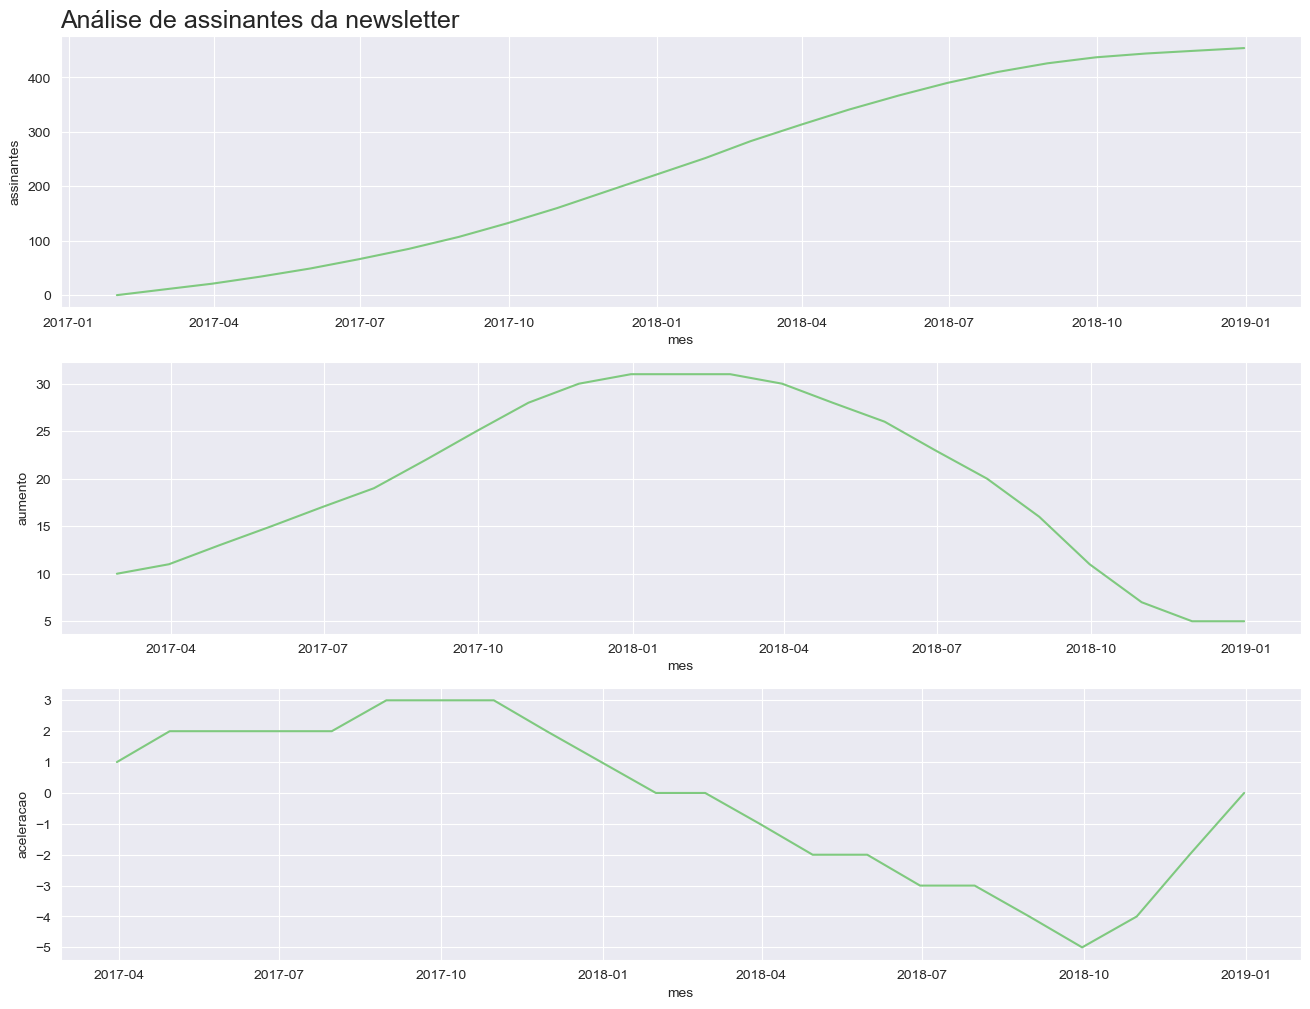

In [31]:
plot_comparacao('mes','assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

## Chocolura - analisando as vendas

In [32]:
chocolura= pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [33]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [34]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [35]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0
5,2017-06-01,300,89.0,158.0
6,2017-07-01,210,-90.0,-179.0
7,2017-08-01,205,-5.0,85.0
8,2017-09-01,208,3.0,8.0
9,2017-10-01,210,2.0,-1.0


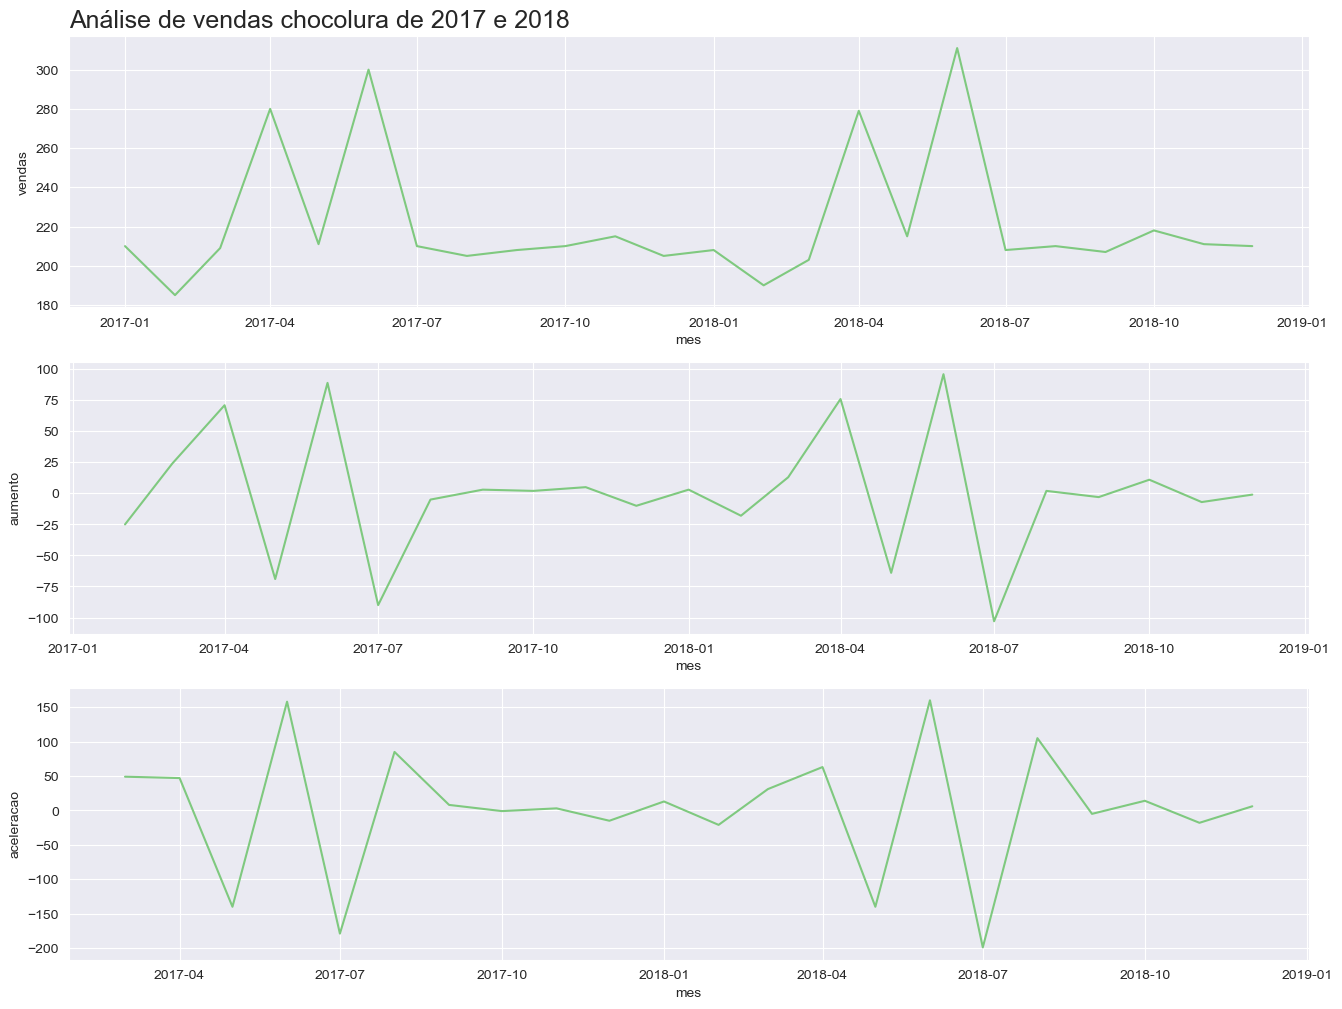

In [36]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas chocolura de 2017 e 2018')

## Chocolura - vendas diárias (outubro e novembro)

In [37]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51
...,...,...
56,2018-11-26,54
57,2018-11-27,60
58,2018-11-28,49
59,2018-11-29,50


In [38]:
print('quantidade de linhas e colunas:', vendas_por_dia.shape)
print('Quantidade de valores nulos:',vendas_por_dia.isna().sum().sum())

quantidade de linhas e colunas: (61, 2)
Quantidade de valores nulos: 0


In [39]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [40]:
vendas_por_dia['dia']= pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [41]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0
...,...,...,...,...
56,2018-11-26,54,34.0,31.0
57,2018-11-27,60,6.0,-28.0
58,2018-11-28,49,-11.0,-17.0
59,2018-11-29,50,1.0,12.0


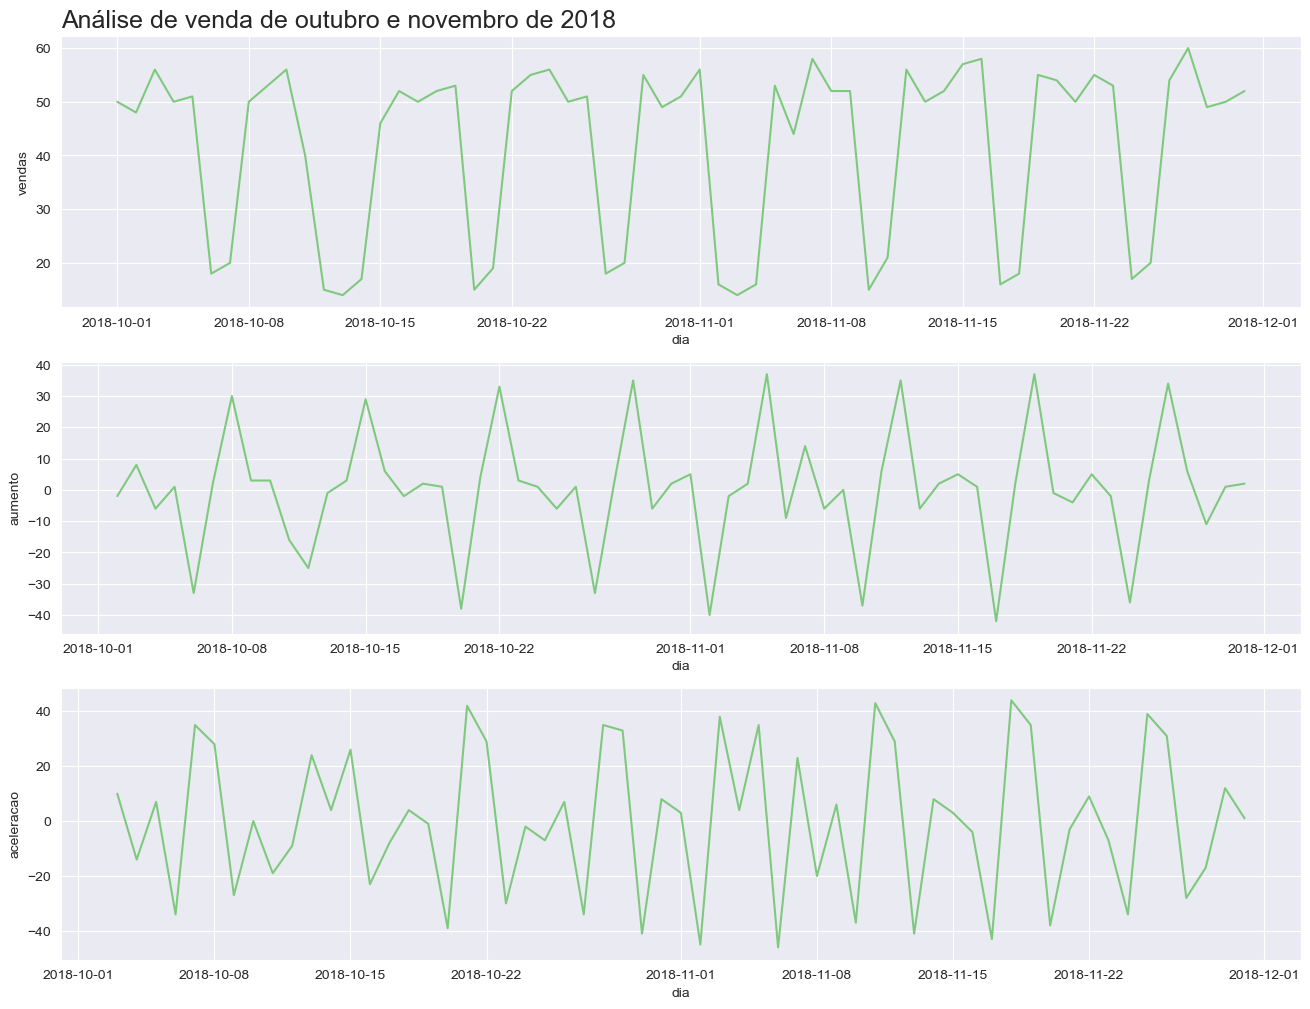

In [42]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de venda de outubro e novembro de 2018')

## Correlação das vendas diárias

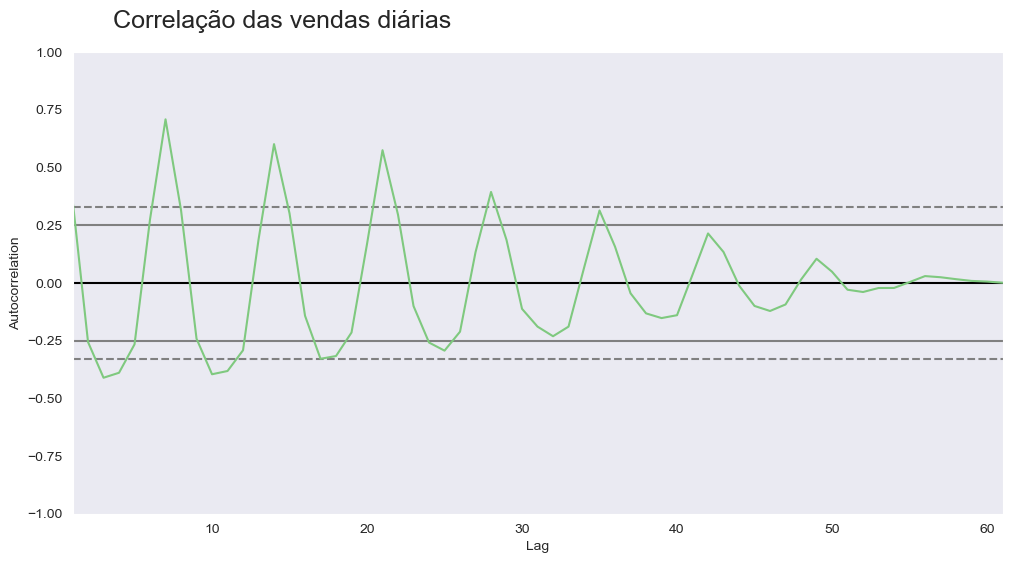

In [43]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize =18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax=ax

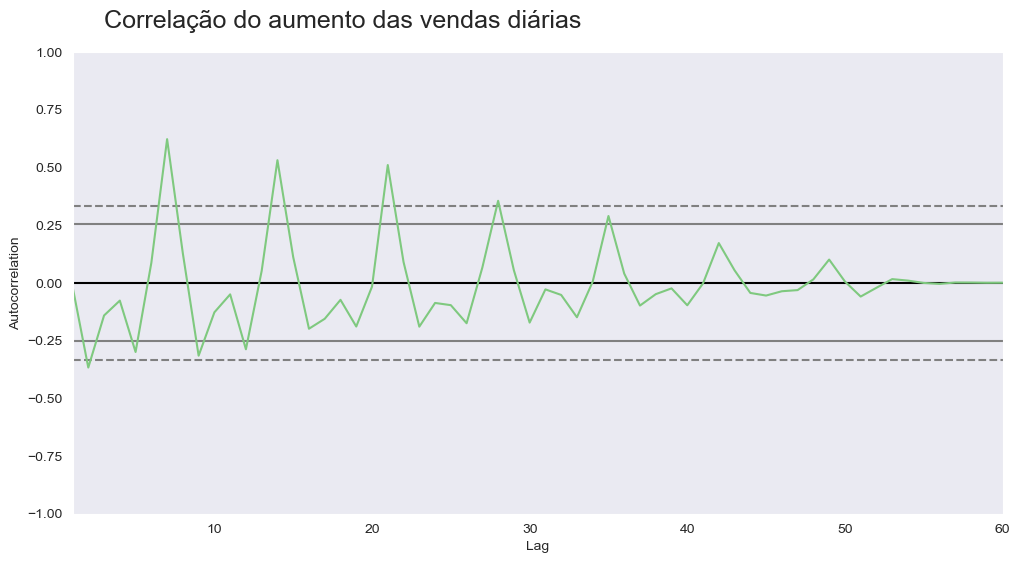

In [44]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize =18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax=ax

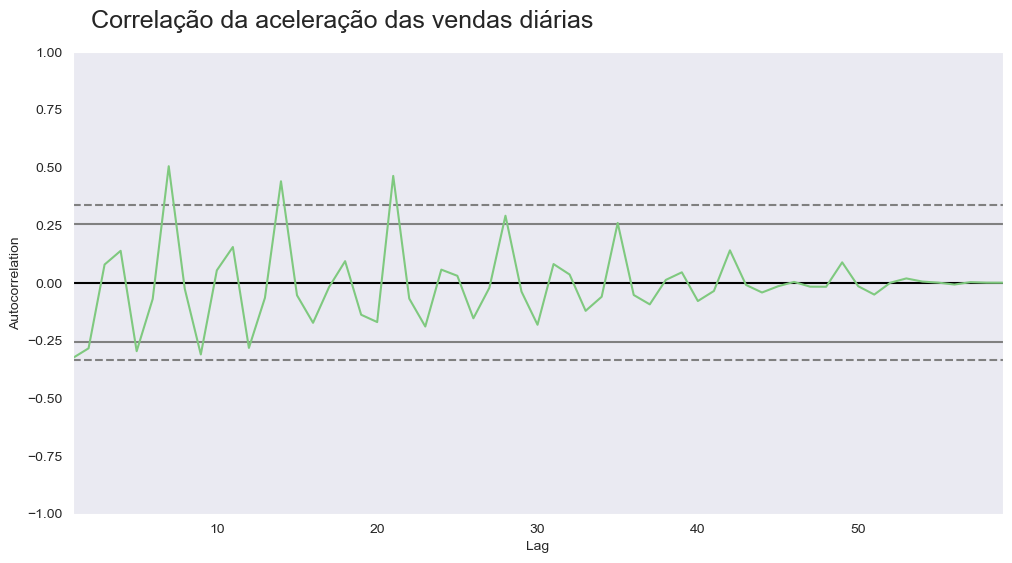

In [45]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize =18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax=ax

# Cafelura - análise de vendas

In [46]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [47]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [48]:
cafelura['mes']= pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [49]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de números nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de números nulos: 0


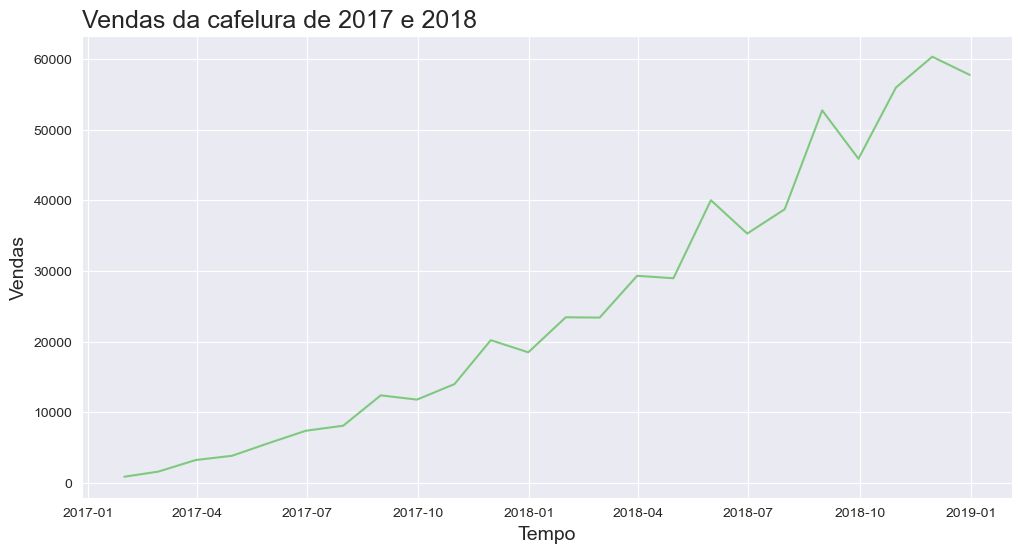

In [50]:
plotar('Vendas da cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [51]:
quantidade_de_dias_de_fds= pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9
5,9
6,8
7,10
8,8
9,8


In [52]:
cafelura['vendas_normalizadas']=cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


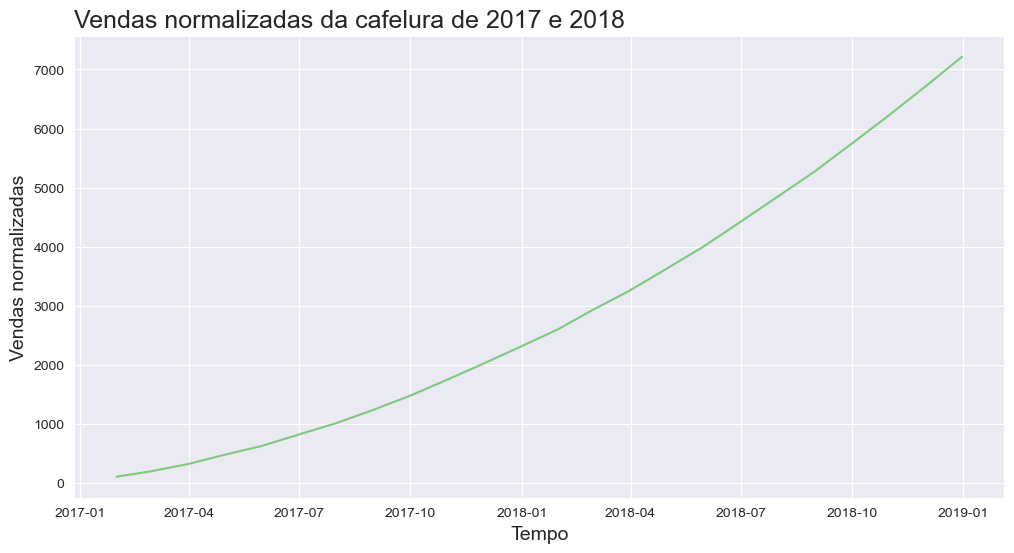

In [53]:
plotar('Vendas normalizadas da cafelura de 2017 e 2018', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

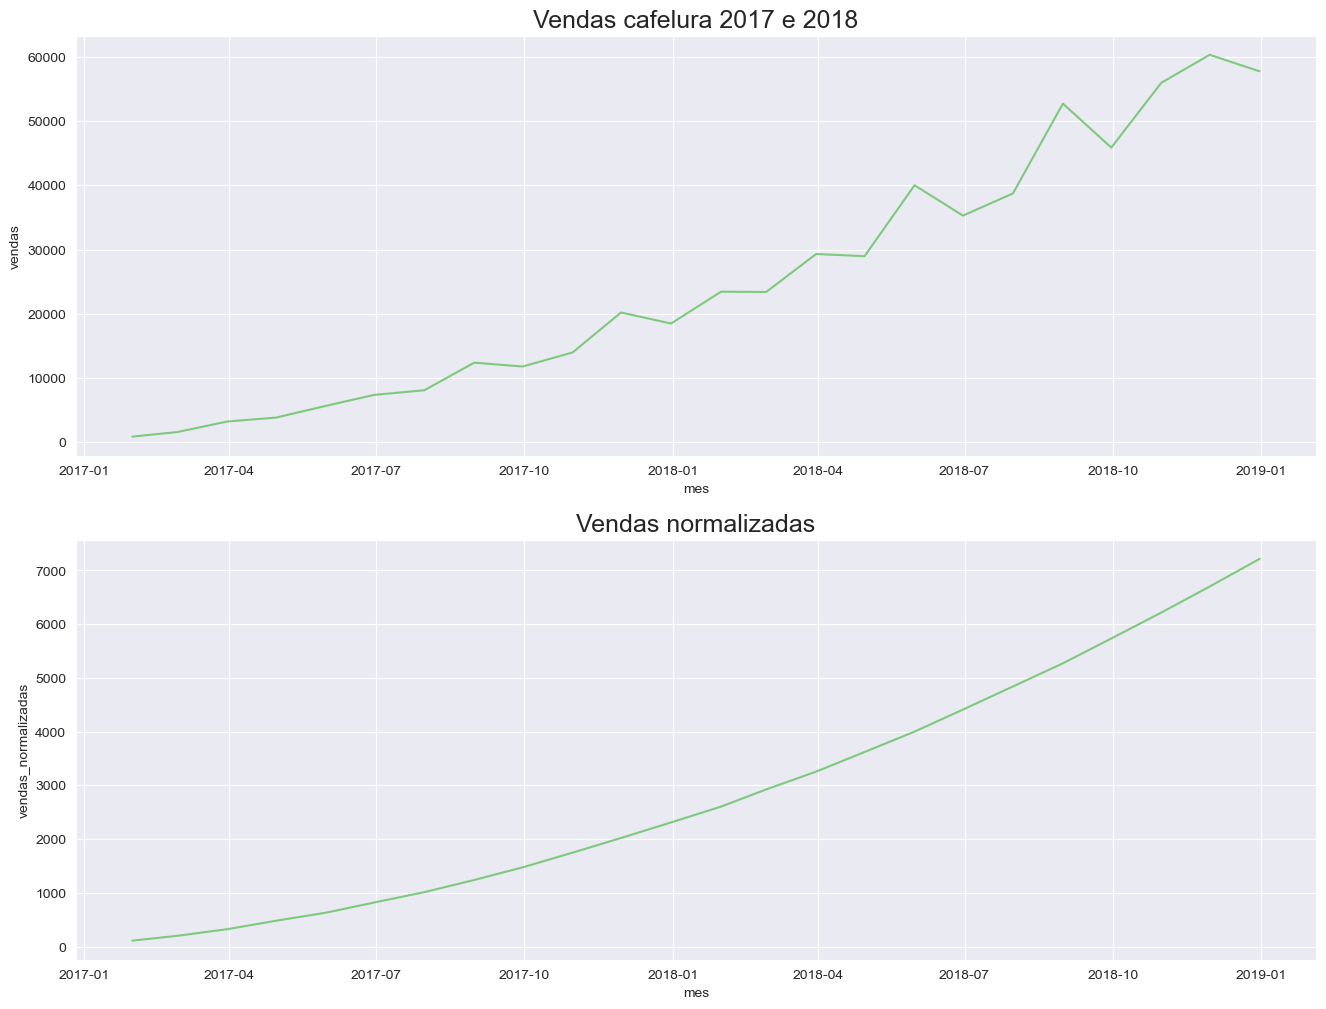

In [54]:
plt.figure(figsize=(16,12))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax


## Alucel - análise de vendas

In [55]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [57]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [60]:
alucel['dia']= pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [68]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('quantidade de valores nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
quantidade de valores nulos: 0


In [72]:
alucel['aumento']= alucel['vendas'].diff()
alucel['aceleracao']= alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


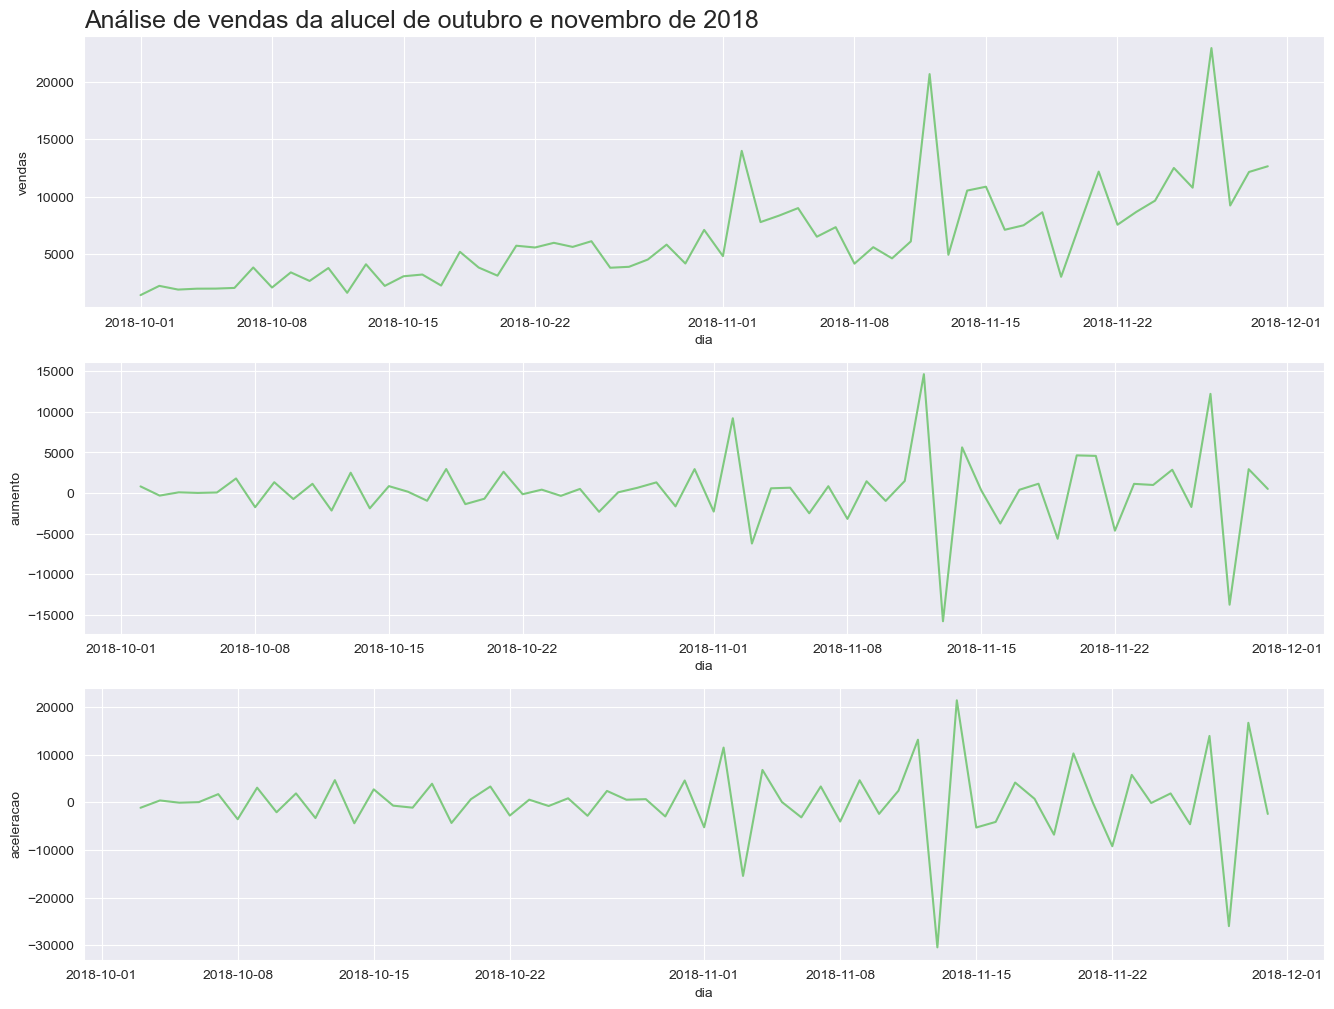

In [73]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da alucel de outubro e novembro de 2018')

## Média móvel

In [74]:
alucel['media_movel']= alucel['vendas'].rolling(7).mean()

In [76]:
alucel.head(10)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


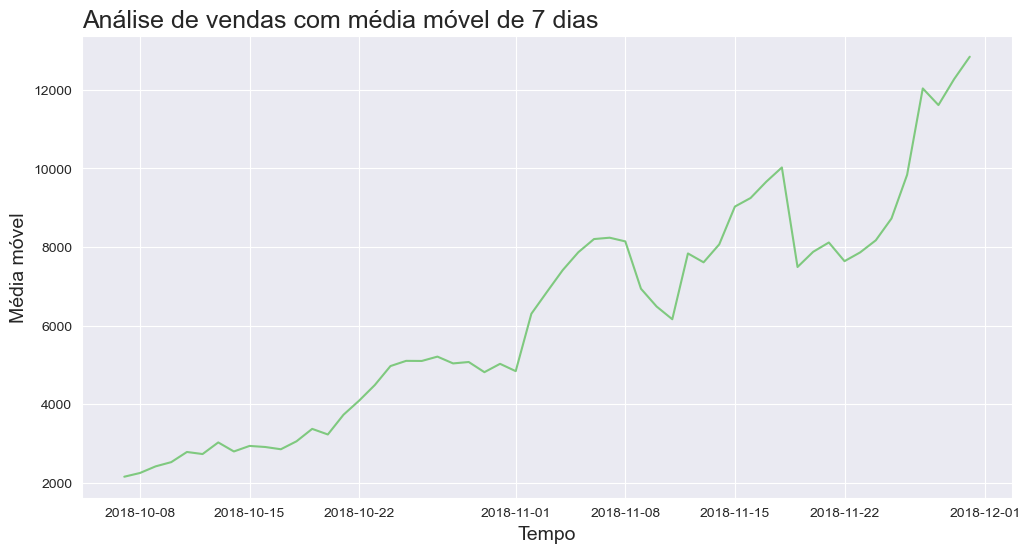

In [77]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média móvel', 'dia', 'media_movel', alucel)

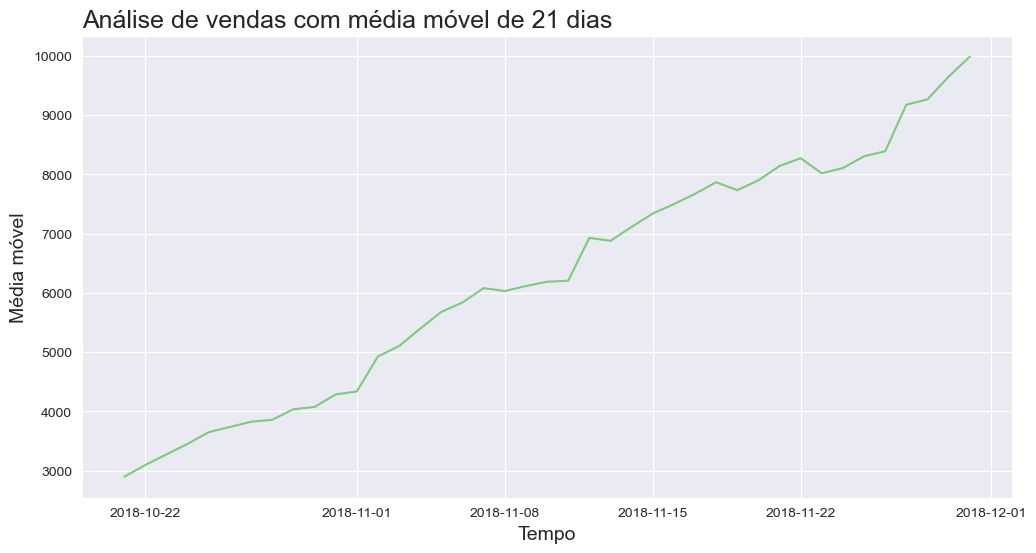

In [79]:
alucel['media_movel_21']= alucel['vendas'].rolling(21).mean()
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média móvel', 'dia', 'media_movel_21', alucel)

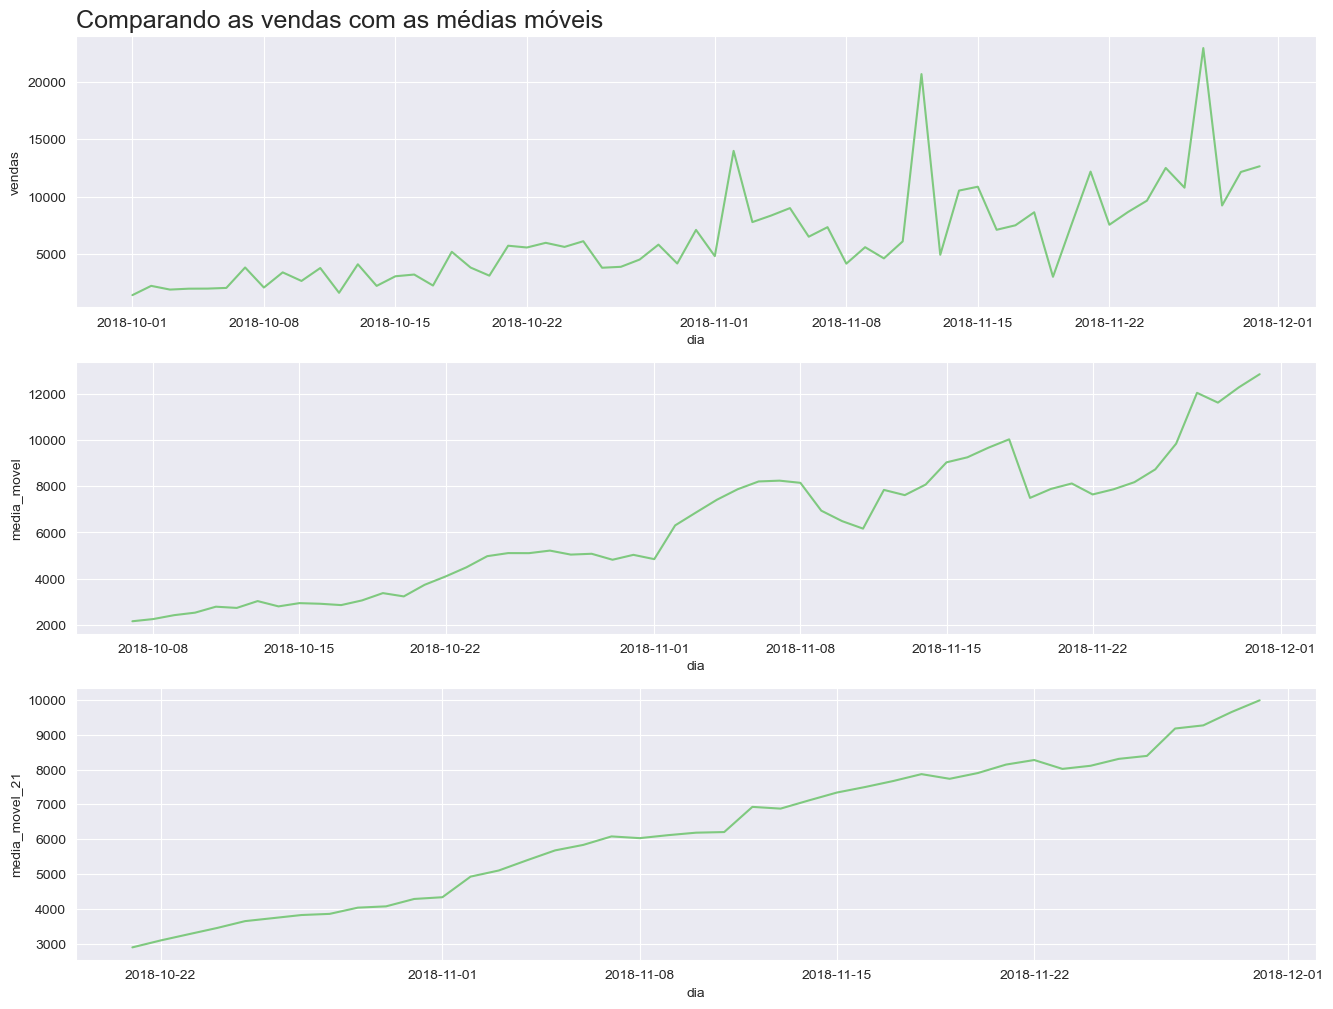

In [80]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21',alucel, 'Comparando as vendas com as médias móveis')